## Incorporating the Parasitoid Model into a Stochastic Model for Parameter Estimation

We have two main tasks here:
1. Assign priors to the parasitoid model parameters
2. Incorporate the parasitoid model into a larger stochastic model for field sampling and acquiring emergence data, so that we can compute the likelihood of our data given the model.

### Assigning priors to the parasitoid model parameters

The parasitoid model has the following parameters:
- current simulation day, $d$
- wind data, $\mathbf{w}(t,d)$
- $h$ flight probability function parameters, including:
    + probability of flying during the day given ideal conditions $\lambda$
    + $f$ time probability function parameters, including:
        - morning logistic parameters, $a_1$, $b_1$
        - evening logistic parameters, $a_2$, $b_2$
    + $g$ wind flight probability function logistic parameters $a_w$, $b_w$
- diffusion covariance matrix parameters, can be split into:
    + $\sigma_x$ standard deviation in $x$ direction
    + $\sigma_y$ standard deviation in $y$ direction
    + $\rho$ correlation
- distance vs. windspeed scaling parameter $\mu_r$
- flight duration in minutes $t_{dur}$
The simulation day and wind data can be considered fixed in our model, and so will not be considered further.

$\lambda$ is a probability, so it can only take on continuous values between 0 and 1. We might assume it is close to 1 in starting our MCMC algorithm.

$$\lambda \sim \mbox{Beta}(\alpha = 5,\beta = 1)$$

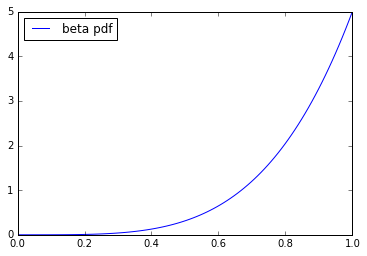

In [5]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

a, b = 5, 1

plt.figure()
x = np.linspace(0,1,100)
plt.plot(x,stats.beta.pdf(x,a,b),label='beta pdf')
plt.legend(loc='best')
plt.show()

$a_1$ and $a_2$ are parameters which control the position of their logistic functions. They can take on continuous values, but must be limited - $a_1$ should take on a value sometime generally around sunrise, and $a_2$ should take on a value sometime generally around sunset. We can use a truncated normal distribution for each:

$$a_1 \sim \mathcal{N}(\mu=6,\sigma^2=1,a=0,b=12)\ \ \ \ \ \ \ \ \ b_1 \sim \mathcal{N}(\mu=18,\sigma^2=1,a=12,b=24)$$

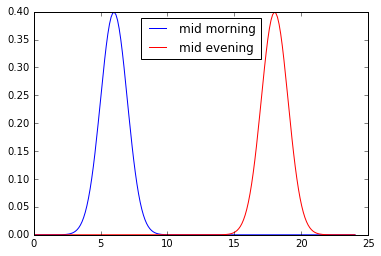

In [24]:
%matplotlib inline
from math import sqrt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

mu1,sig1 = 6,1
mu2,sig2 = 18,1

rv1 = stats.norm(mu1,sig1)
rv2 = stats.norm(mu2,sig2)

plt.figure()
x = np.linspace(0,24,200)
plt.hold(True)
plt.plot(x,rv1.pdf(x),'b',label='mid morning')
plt.plot(x,rv2.pdf(x),'r',label='mid evening')
plt.legend(loc='best')
plt.hold(False)
plt.show()

$a_2$ and $b_2$ are parameters which control the scaling of their logistic functions. They can take on any positive value. Let's use the Gamma distribution - does PyMC use $\alpha$ and $\beta$? What starting values should we choose?